In [1]:
#import packages for checking through the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from sklearn import preprocessing
#just to ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
trainData = pd.read_csv("train.csv", delimiter=",")
testData = pd.read_csv("test.csv", delimiter=",")

#save the 'Id' columns
trainId = trainData['Id']
testId = testData['Id']

#save the train shape for when we recombine later
nTrain = trainData.shape[0]
nTest = testData.shape[0]

In [3]:
#check column names
trainData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Checking all the columns in our data set

In [4]:
#descriptive statistic summary of target field
trainData['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

So we see up here that minimum price is larger than 0
so it doesn't seem to have anything that could destroy our model

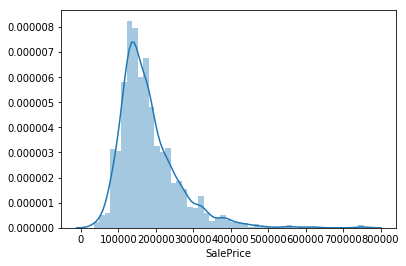

In [5]:
#histogram
sns.distplot(trainData['SalePrice'])

Right skewed, shows peak 

Once we have made the excel sheet with:
1. **Variable Name:** Name of variable
2. **Type:** Wether the variable is categorical or numerical
3. **Segments:** Identify possible segments e.g **Building** relates to physical charateristics of a building. **Space** relates tospace properties of a building
4. **Expectations:** Our expectation of how the variable influences the target variable, use **High, Medium** and **Low** as values
5. **Conclusion:** Importance of the variable, use same scale as Expectations

Once completed make scatter plots of each variable against the target variable

## Relationship with numerical variables

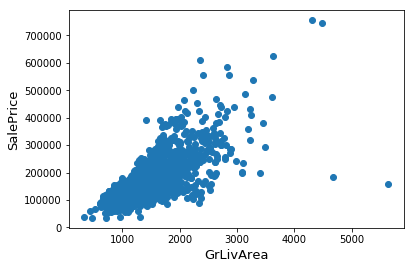

In [6]:
#One of the high related to sale price GrLivArea(living area square feet)
fig, ax = plt.subplots()
ax.scatter(x = trainData['GrLivArea'], y = trainData['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see some outliers here so lets remove them from the data set

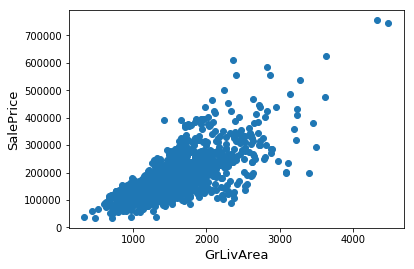

In [7]:
#now we can see the outliers lets remove them from the data
trainData = trainData.drop(trainData[(trainData['GrLivArea']>4000) & (trainData['SalePrice']<300000)].index)
#Re-look at the GrLivArea after removing outliers
fig, ax = plt.subplots()
ax.scatter(x = trainData['GrLivArea'], y = trainData['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We have another relation with totalBsmtSF so we can take a look at that one
aswell

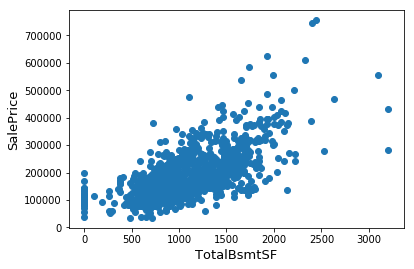

In [8]:
#same with totalBsmtSF (total basement area)
fig, ax = plt.subplots()
ax.scatter(x = trainData['TotalBsmtSF'], y = trainData['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

Potential outliers that may not mean anything here but lets remove them lower
end ones

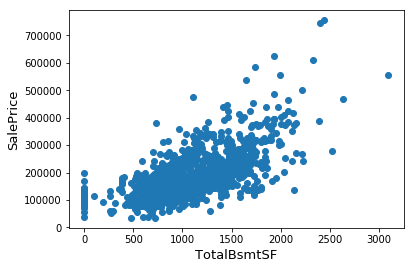

In [9]:
#now we can see the outliers lets remove them from the data
trainData = trainData.drop(trainData[(trainData['TotalBsmtSF']>3000) & (trainData['SalePrice']<500000)].index)
#visualize once the outliers are removed
fig, ax = plt.subplots()
ax.scatter(x = trainData['TotalBsmtSF'], y = trainData['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

## Relationship with categorical Features

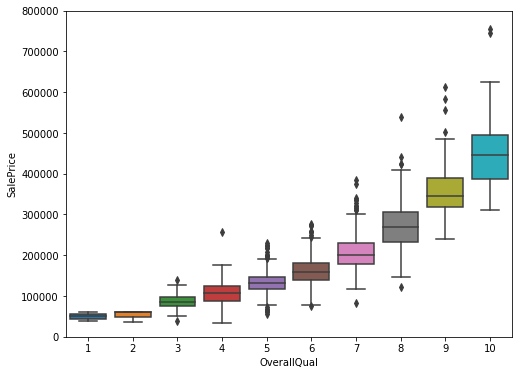

In [10]:
#box plot overallqual/saleprice
data = pd.concat([trainData['SalePrice'], trainData['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

**OverallQuall** relates really well with price, as its the overall materail
quality of the house, better material more expensive house

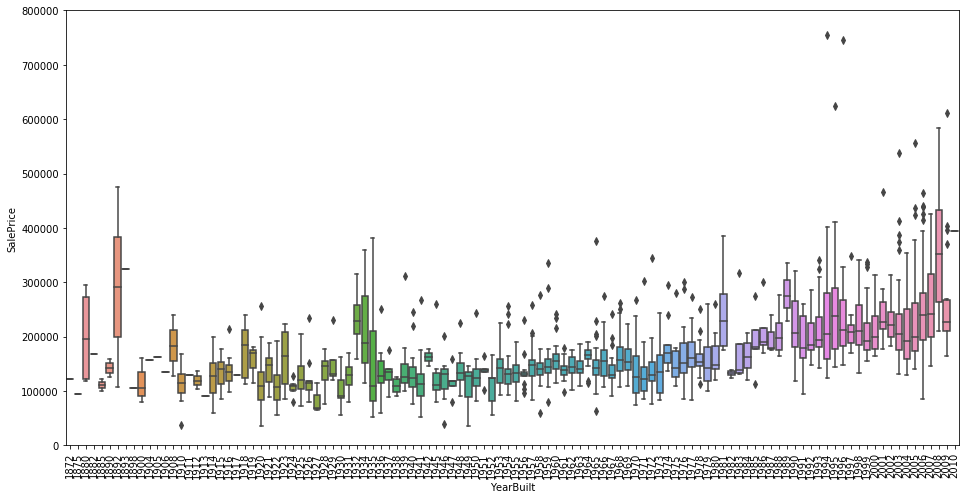

In [11]:
#check year built also as a lot of data here
data = pd.concat([trainData['SalePrice'], trainData['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

This part is to be expected, people are willing to pay more for newer houses than old relics, even though it doesn't seem a strong tendency

__Summary__

For looking through the data and relating everything subjectiveley we can see some linearity between some variables along with SalePrice. There are so many more variables to analyse for our feature selection.

## Correlation heatmap

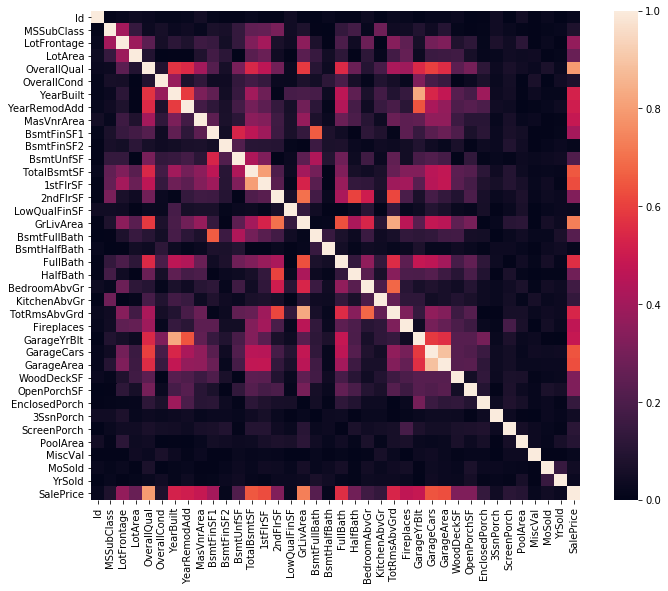

In [12]:
#Correlation matrix to see how features are correlated with SalePrice
corrmat = trainData.corr()
corrmat = abs(corrmat)
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, vmin=0, square=True)

A heatmap is a nice quick way to see relationships between our independant and dependant variables.
There are a couple standouts here being **'OverallQual', 'GrLivArea', 'TotalBsmtSF'** and the **Garage areas**.
With correlation this strong it can indicate a situation of multicollinearity.
Also some of this information can give us the same information so multicollinearity really does occur here.

## Zoomed in Heatmap of top 10 Largest Correlated

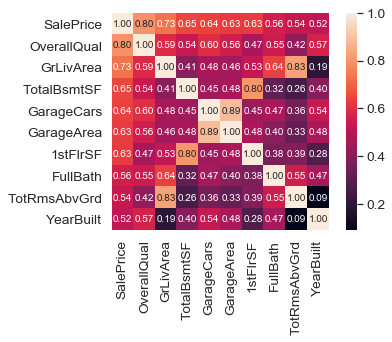

In [13]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(trainData[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Here we have the top 10 variables that are most correlated with the target 'SalePrice'
Points on the data taken:
1. 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
2. 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However these variables are so closely related as in number of cars and garage size that we most likely only need one of them
3. 'TotRmsAbvGrd' and 'GrLivArea', exact same measurement again in bottom floor grade

## Scatter Plots between correlated values and 'SalesPrice'

Now we have the correlated values lets check the scatter plots for more information

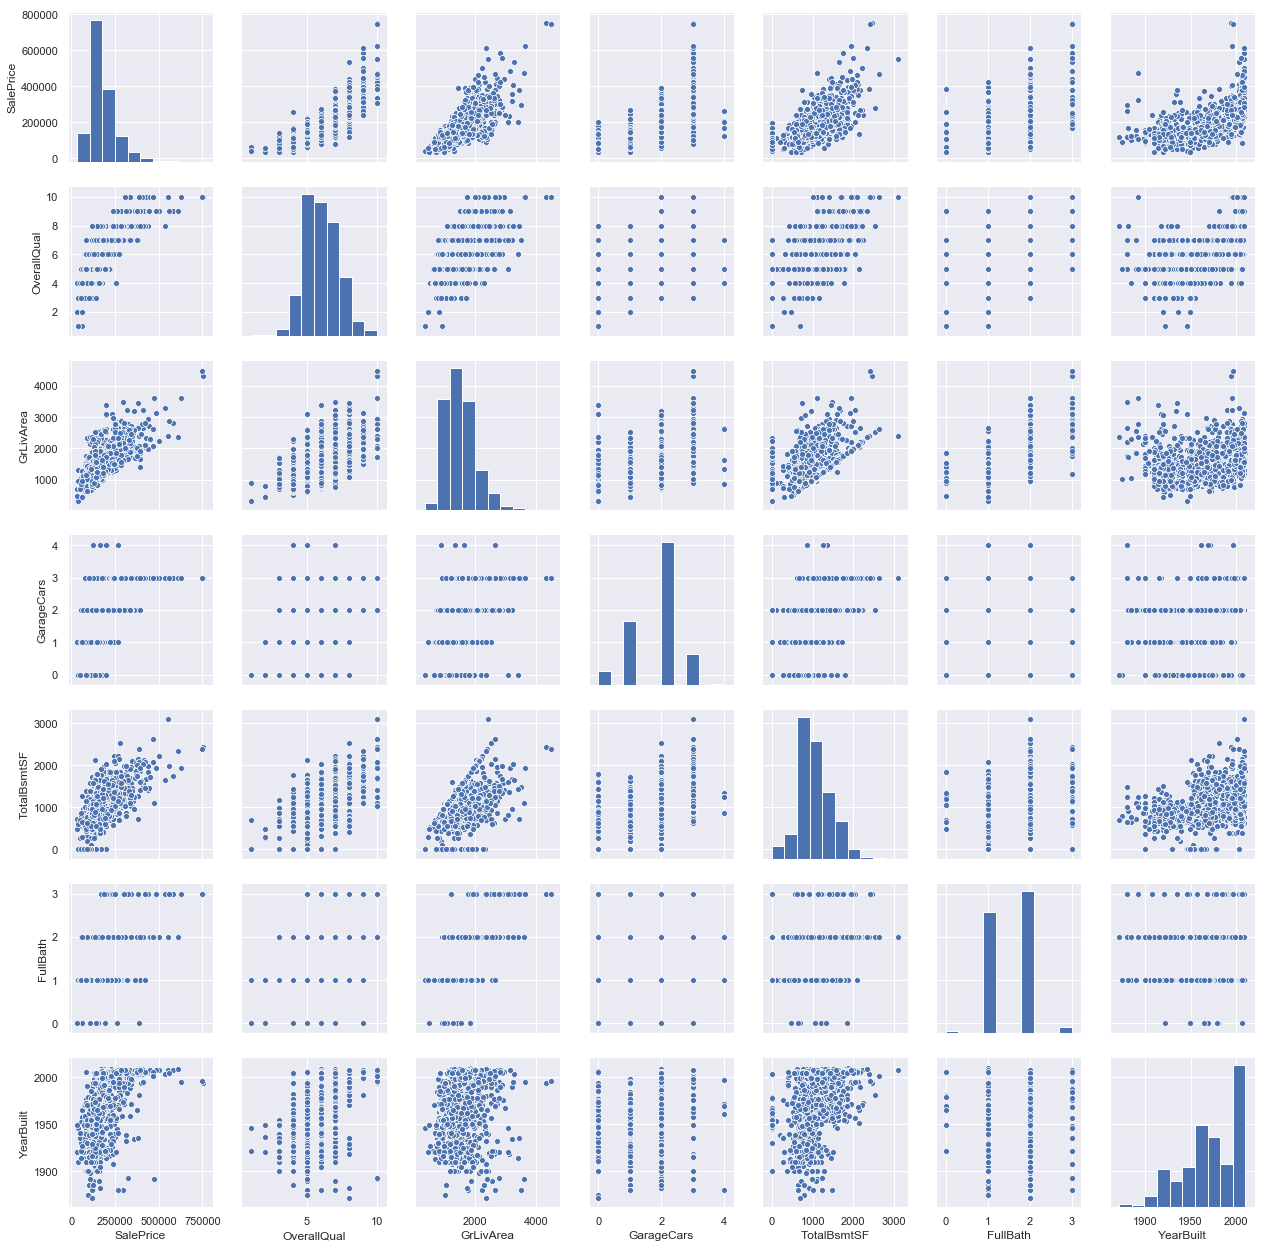

In [14]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(trainData[cols], size = 2.5)
plt.show();

So with the scatter plot here we can get a better idea of relationships between variables and each other along with the targets variable 'SalesPrice'.
Now We move to Missing Data

## Missing Data

Let's first concatenate the train and test data into the same dataframe so we can fix  all missing values easily.
Since we removed some outliers the shape should of changed and we save this for later returning trhe data

In [15]:
#save the train shape for when we recombine later
nTrain = trainData.shape[0]
nTest = testData.shape[0]

In [16]:
#concat the data together
yTrain = trainData['SalePrice']
allData = pd.concat((trainData, testData)).reset_index(drop=True)
allData = allData.drop(['SalePrice'], axis=1)
print("all_data size is : {}".format(allData.shape))

all_data size is : (2915, 80)


Now the data is together we can check for percentage of missing data from the columns so we know which ones to be looking at.

In [17]:
#check ratio of missing values
missingData = (allData.isnull().sum() / len(allData)) * 100
#now lets make a graph to see by dropping all values that == 0 and then sorting them
missingData = missingData.drop(missingData[missingData == 0].index).sort_values(ascending=False)[:30]
missingData = pd.DataFrame({'Missing Ratio' : missingData})
missingData.head(30)

,Missing Ratio
PoolQC,99.691252
MiscFeature,96.397942
Alley,93.207547
Fence,80.411664
FireplaceQu,48.713551
LotFrontage,16.638079
GarageQual,5.454545
GarageCond,5.454545
GarageFinish,5.454545
GarageYrBlt,5.454545


Now we have the percentage of data missing from columns we can start cleaning and fixing issues, this is a good time to go over the columns to understand why there are missing values in the first place.

According to the data sheet given: 
* na for alley means None
* na for Bsmt means None
* na for Fireplace means None
* na for garage means None
* na for pool means None
* na for fence means None
* na for misc means None
* na for MasVnrType means None

so we can easily replace them

In [18]:
#now replace the NA in allData with None
allData[['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'
           ,'BsmtFinType2','FireplaceQu','GarageType','GarageFinish'
           ,'GarageQual','GarageCond','PoolQC','Fence','MiscFeature','MasVnrType']] = allData[['Alley', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'
                                                                                                 ,'BsmtFinType2','FireplaceQu','GarageType','GarageFinish'
                                                                                                 ,'GarageQual','GarageCond','PoolQC','Fence','MiscFeature'
                                                                                                 ,'MasVnrType']].fillna("None")

In [19]:
#we have a couple more here where if NA in the data it means there is 0 or doesn't exist in the house
allData[['GarageYrBlt','MasVnrArea','GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
         'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']] = allData[['GarageYrBlt','MasVnrArea','GarageArea',
                                                                   'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                                                   'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']].fillna(0)

We sort out numerical data here with 0's when they dont have an area or number that can be used (they dont exist in the house)

In [20]:
#For some of the categorical data we can fill it with the most common string
allData['Electrical'] = allData['Electrical'].fillna(allData['Electrical'].mode()[0])
allData['Exterior1st'] = allData['Exterior1st'].fillna(allData['Exterior1st'].mode()[0])
allData['Exterior2nd'] = allData['Exterior2nd'].fillna(allData['Exterior2nd'].mode()[0])
allData['KitchenQual'] = allData['KitchenQual'].fillna(allData['KitchenQual'].mode()[0])
allData['MSZoning'] = allData['MSZoning'].fillna(allData['MSZoning'].mode()[0])
allData['Functional'] = allData['Functional'].fillna(allData['Functional'].mode()[0])
allData['SaleType'] = allData['SaleType'].fillna(allData['SaleType'].mode()[0])
allData['Utilities'] = allData['Utilities'].fillna(allData['Utilities'].mode()[0])

With categorical data that has low missing values which don't mean None we can replace the NA's with the mode being the most common string in the data

In [21]:
#for lot frontage we use the median and an imputer
imp=sk.preprocessing.Imputer(missing_values="NaN", strategy="median" )
imp.fit(allData[['LotFrontage']])
allData['LotFrontage']=imp.transform(allData[['LotFrontage']])

At this point we can check if there are any final missing values by doing the same we did before

In [22]:
#check ratio of missing values
missingData = (allData.isnull().sum() / len(allData)) * 100
#now lets make a graph to see by dropping all values that == 0 and then sorting them
missingData = missingData.drop(missingData[missingData == 0].index).sort_values(ascending=False)[:30]
missingData = pd.DataFrame({'Missing Ratio' : missingData})
missingData.head(30)

,Missing Ratio


No missing Values remain

## Data Transformation

* **Normality** - When we say normality we mean  is that the data should look like a normal distribution. This is important because several statistics test rely on this. We will just check for univariate normality over the 'SalePrice'. univariate normality doesn't ensure multivariate normality but it helps.
* **Homoscedasticity** - refers to the assumption that dependant variables exhibit equal levels of variance across the range of predictor variables
* **Linearity** - We already checked a lot of this through scatter plots , if patterns aren't linear it is worthwhile to explore data transformations. Ours are luckily linear

### So lets find normality in our SalePrice

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* **Histogram** - Kurtosis and skewness.
* **Normal probability plot** - Data distribution should closely follow the diagonal that represents the normal distribution.

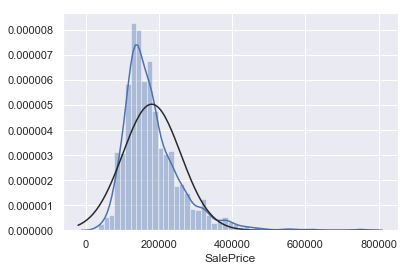

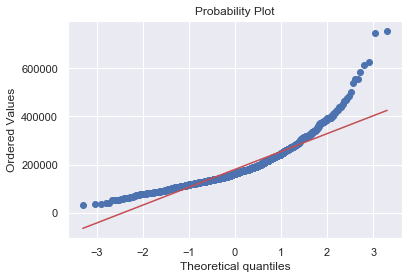

In [23]:
#histogram and normal probability plot
sns.distplot(yTrain, fit=norm)
fig = plt.figure()
res = stats.probplot(yTrain, plot=plt)

Sale price shows a right skew as the tail end trickles off to the right, it isn't normal, it is a positive skew but does not follow the diagonal line.
A data transformation can fix the problem though, in case of a positive skew a log transformation usually works well.

In [24]:
#applying log transformation to the 'SalePrice'
yTrain = np.log(yTrain)
#yTrain = yTrain.map(lambda i: np.log(i) if i > 0 else 0)

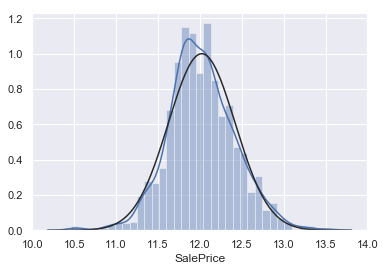

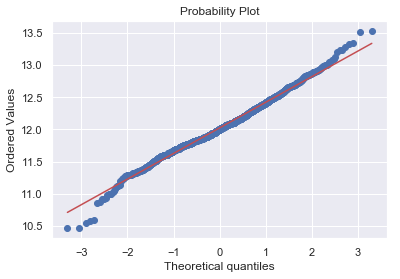

In [25]:
#show the new log transformed data
sns.distplot(yTrain, fit=norm)
fig = plt.figure()
res = stats.probplot(yTrain, plot=plt)

From the above scatter plots we see a possiblility as well to normalise GrLivArea and see that it is a similair case and we can normalise this value aswell

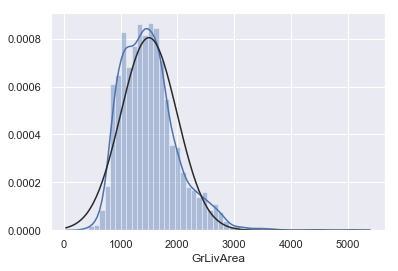

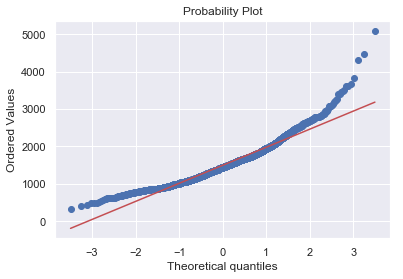

In [26]:
#histogram and normal probability plot
sns.distplot(allData['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(allData['GrLivArea'], plot=plt)

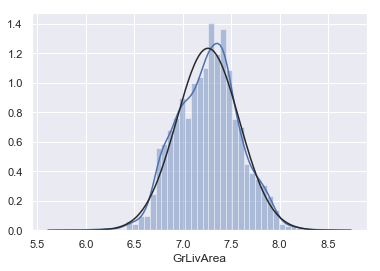

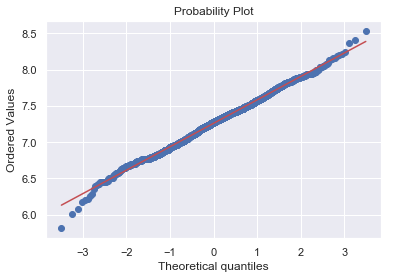

In [27]:
#applying log transformation to the 'GrLivArea'
allData['GrLivArea'] = np.log(allData['GrLivArea'])

#histogram and normal probability plot
sns.distplot(allData['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(allData['GrLivArea'], plot=plt)

A much better linear plot here after normalising

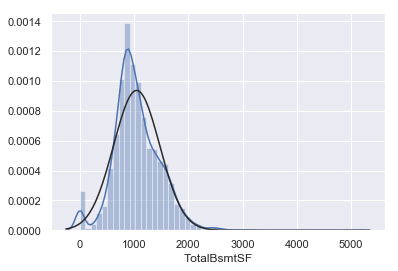

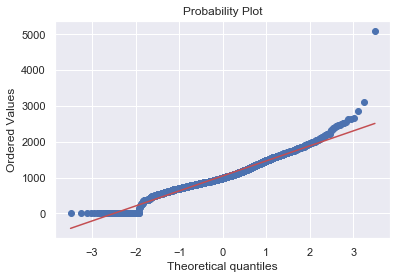

In [28]:
#histogram and normal probability plot
sns.distplot(allData['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(allData['TotalBsmtSF'], plot=plt)

In [29]:
numeric_feats = allData.dtypes[allData.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = allData[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.932147
PoolArea,17.682542
LotArea,13.106142
LowQualFinSF,12.080315
3SsnPorch,11.368094
KitchenAbvGr,4.298845
BsmtFinSF2,4.153730
EnclosedPorch,4.016169
ScreenPorch,3.943508
BsmtHalfBath,3.928397


In [30]:
#finally convert categorical variables into dummies
#also removing some of the values here that had a really high missing ratio
#allData = allData.drop(['Utilities','PoolQC', 'MiscFeature','Alley', 'Fence', 'FireplaceQu','MiscVal','PoolArea','LotArea', 'LowQualFinSF', '3SsnPorch' ], axis=1)
#allData = pd.get_dummies(allData)

What we are going to do here instead is use a boxcox transformation which using lambda value can apply a transformation across the skewed data
* lambda = -1. is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform.

In [31]:
skewness = skewness[abs(skewness) > 0.7]

skewedFeatures = skewness.index
newLambda = 0.15

for feat in skewedFeatures:
    allData[feat] = boxcox1p(allData[feat], newLambda)

In [32]:
#convert categorical to numerical
allData = pd.get_dummies(allData)

Lets return our train and test data splits that we broke off before

In [33]:
#sorting data back
train = allData[:nTrain]
test = allData[:nTest]

#drop 'Id'
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

## Modelling

In [34]:
#import libraries
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

In [35]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, yTrain, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [36]:
#Gradient boost with huber as the loss function to be robust to outliers
GBoost = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.005,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [37]:
#xgboost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.005, max_depth=4, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [38]:
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [39]:
#Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [40]:
score = rmsle_cv(lasso)
print("lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

lasso score: 0.1125 (0.0070)



In [41]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1154 (0.0060)



In [42]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1148 (0.0083)



In [43]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1186 (0.0067)



In [44]:
#rmse function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
model_xgb.fit(train, yTrain)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(yTrain, xgb_train_pred))

In [ ]:
KRR.fit(train, yTrain)
KRR_train_pred = KRR.predict(train)
KRR_pred = (KRR.predict(test))
print(rmsle(yTrain, KRR_train_pred))

In [ ]:
lasso.fit(train, yTrain)
lasso_train_pred = lasso.predict(train)
lasso_pred = (lasso.predict(test))
print(rmsle(yTrain, lasso_train_pred))

In [ ]:
GBoost.fit(train, yTrain)
GBoost_train_pred = GBoost.predict(train)
GBoost_pred = (GBoost.predict(test))
print(rmsle(yTrain, GBoost_train_pred))

In [ ]:
ensemble = (GBoost_pred + xgb_pred)/2

## Saving To a CSV

In [ ]:
#creating the csv
sub = pd.DataFrame()
sub['Id'] = testId
sub['SalePrice'] = ensemble
sub.to_csv('NewSubmission.csv',index=False)